In [1]:
pip install pycaret[full]==2.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.clustering import *
from sklearn.datasets import make_blobs

mpl.rcParams['figure.dpi'] = 300

In [4]:
# edit csv location

data = pd.read_csv('/content/Sablayan_Data.csv')
data = data.drop(['Unnamed: 0'], axis=1)

,id,BARANGAY,PSGC,LAND COVERAGE,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI
0,22,Ligaya,PH175109009,Brush/Shrubs,0,0.000000,1,1,0,0,2.0,1,0.000000
1,23,Burgos,PH175109009,Brush/Shrubs,0,0.000000,0,0,0,0,2.0,1,0.000000
2,49,Pag-Asa,PH175109004,NaN,0,154.538807,0,0,3,2,0.0,0,1151.197170
3,50,San Agustin,PH175109004,Built Up,0,214.812672,0,0,3,2,0.0,0,1600.191852
4,51,San Agustin,PH175109004,Grassland,0,302.902705,0,0,3,1,0.0,1,2469.775420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,1362,Pag-Asa,PH175109003,Open Forest,0,8.598491,0,0,0,0,3.0,0,117.376229
968,1363,Pag-Asa,PH175109003,Brush/Shrubs,0,16.884621,0,0,0,0,3.0,1,235.553869
969,1364,Pag-Asa,PH175109003,NaN,0,21.536779,0,0,0,0,3.0,0,293.994123
970,1397,Pag-Asa,PH175109003,NaN,0,0.000000,0,0,0,0,3.0,0,0.000000


In [5]:
# HCIonly = data[['id', 'HCFAI']]
HCIonly = data['HCFAI']
HCIdf = HCIonly.to_frame()
HCIdf

,HCFAI
0,0.000000
1,0.000000
2,1151.197170
3,1600.191852
4,2469.775420
...,...
967,117.376229
968,235.553869
969,293.994123
970,0.000000


In [6]:
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,session_id,7652
1,Original Data,"(972, 1)"
2,Missing Values,True
3,Numeric Features,1
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(972, 1)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

In [7]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7651,2649.8615,0.3712,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=7652, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


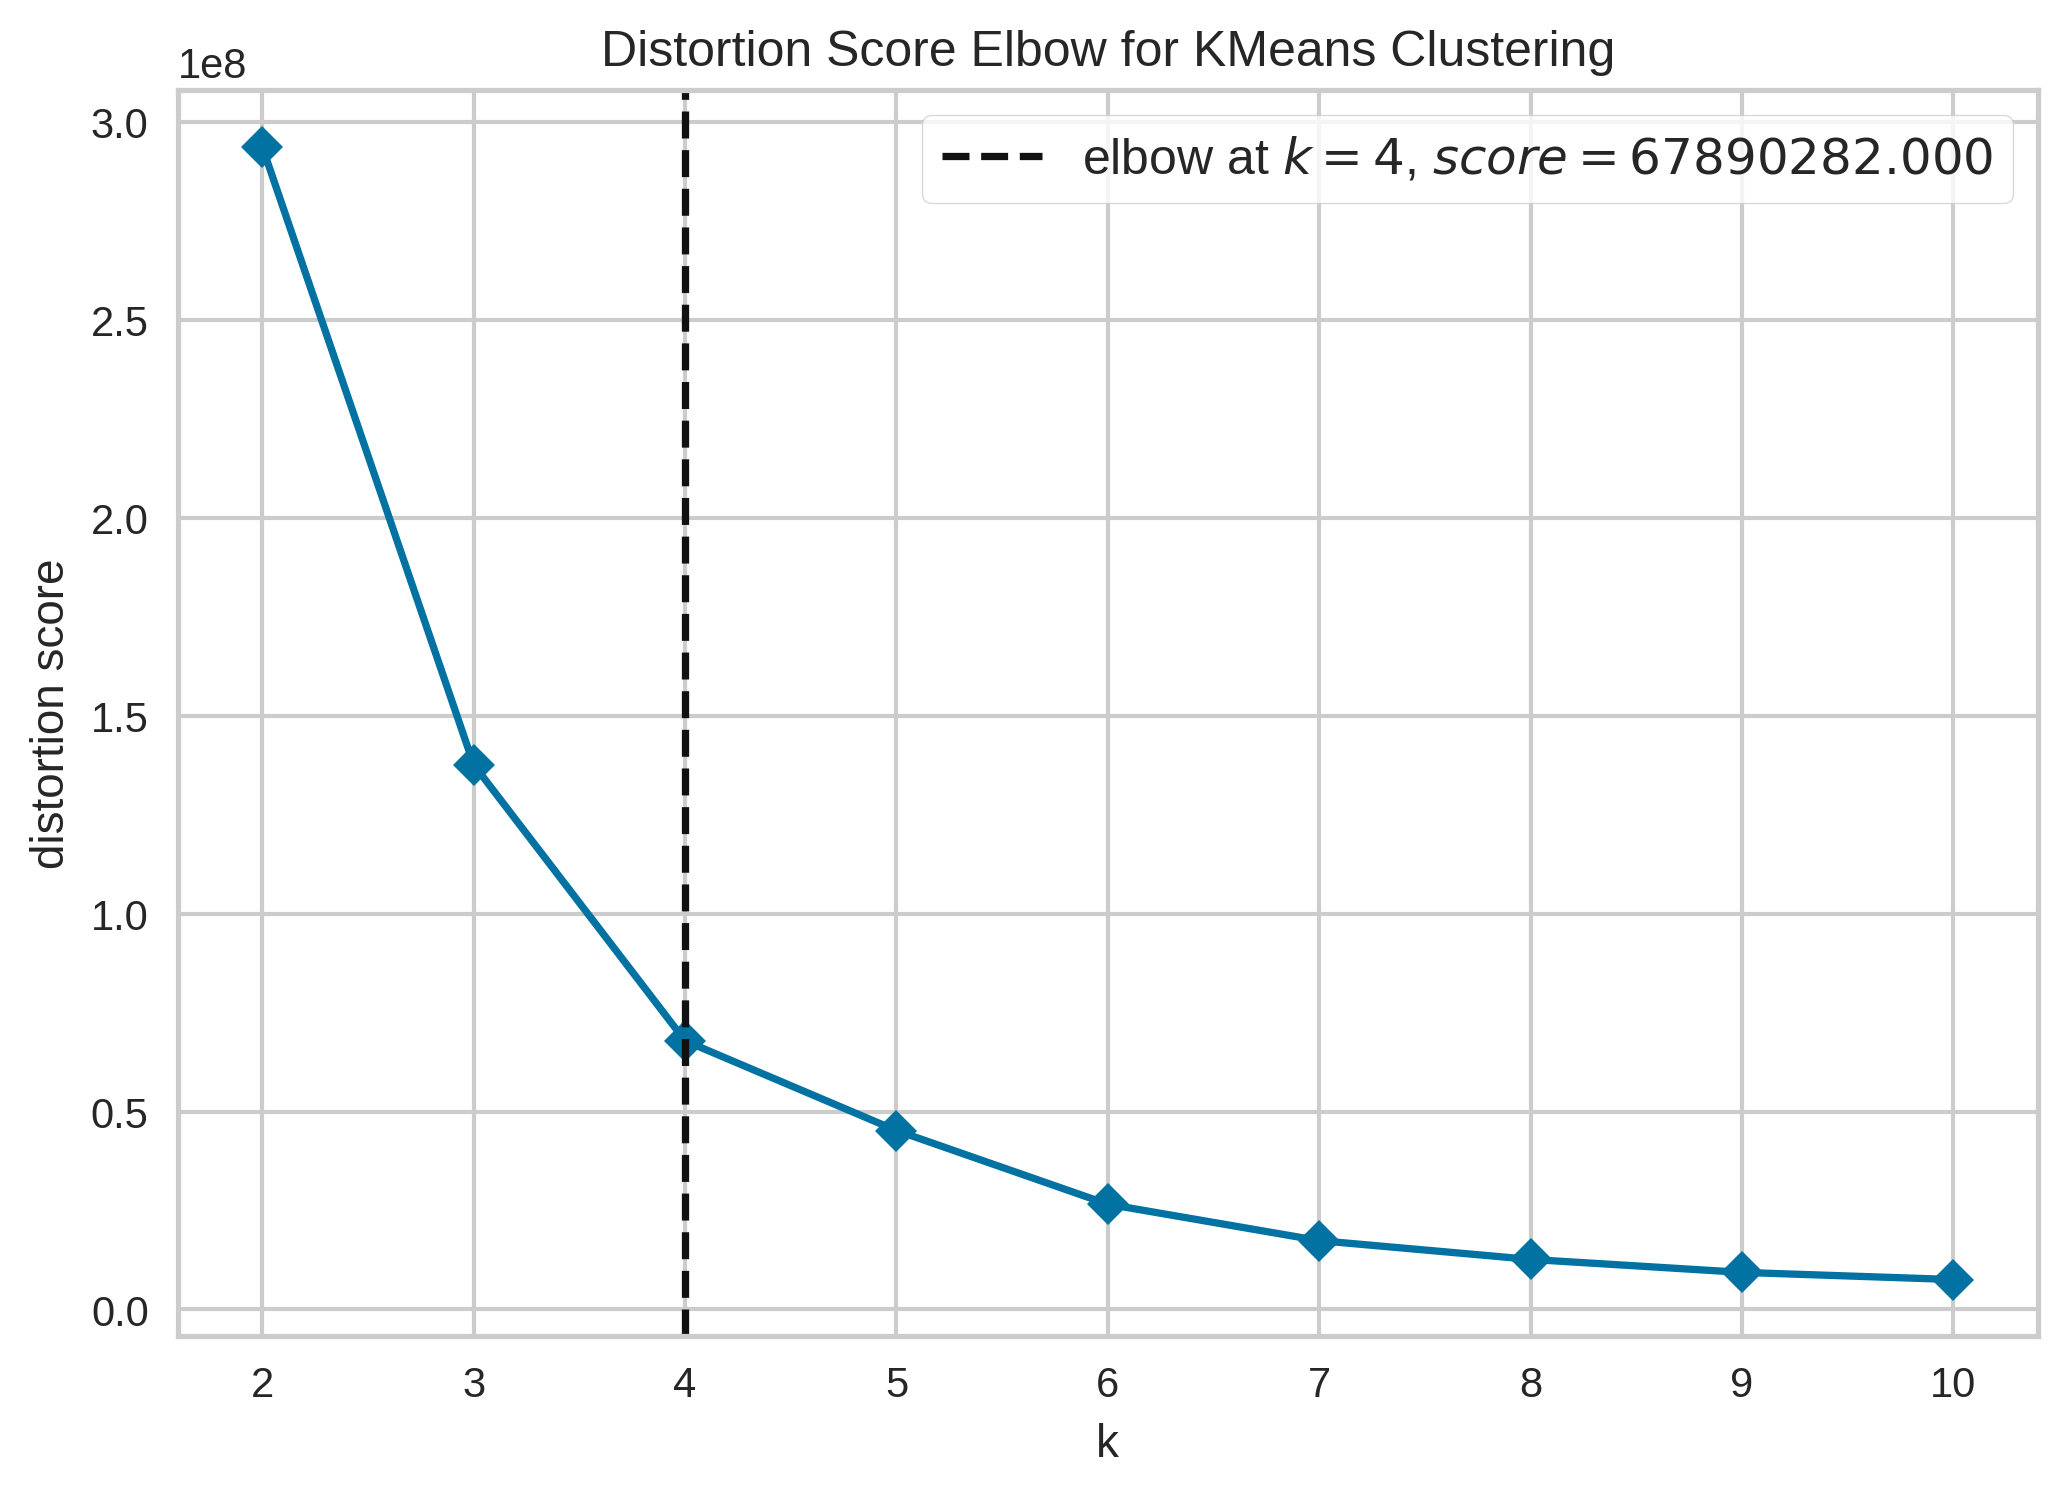

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [8]:
plot_model(model, 'elbow')

In [9]:
model = create_model('kmeans', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7651,2649.8615,0.3712,0,0,0


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=7652, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [10]:
plot_model(model,  plot = 'distribution')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [54]:
# plot_model(model, 'cluster')

In [40]:
save_model(model, 'HCFAIonly_Cluster')

results = assign_model(model)
results.head(10)

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=7652, tol=0.0001, verbose=0), model_name=HCFAIonly_Cluster, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                (

Transformation Pipeline and Model Successfully Saved


INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=7652, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(972, 2)
INFO:logs:assign_model() succesfully completed......................................


,HCFAI,Cluster
0,0.000000,Cluster 0
1,0.000000,Cluster 0
2,1151.197170,Cluster 3
3,1600.191852,Cluster 3
4,2469.775420,Cluster 1
5,5967.815673,Cluster 1
6,0.000000,Cluster 0
7,618.163167,Cluster 0
8,581.721342,Cluster 0
9,1418.065842,Cluster 3


In [13]:
results

,HCFAI,Cluster
0,0.000000,Cluster 0
1,0.000000,Cluster 0
2,1151.197170,Cluster 3
3,1600.191852,Cluster 3
4,2469.775420,Cluster 1
...,...,...
967,117.376229,Cluster 0
968,235.553869,Cluster 0
969,293.994123,Cluster 0
970,0.000000,Cluster 0


In [14]:
results.rename(columns = {'Cluster':'Accessibility'}, inplace = True)

In [29]:
list0 = []
list1 = []
list2 = []
list3 = []
for x in range(972):
  if results['Accessibility'][x] == "Cluster 0":
    list0.append(results["HCFAI"][x])
  elif results['Accessibility'][x] == "Cluster 1":
    list1.append(results["HCFAI"][x])
  elif results['Accessibility'][x] == "Cluster 2":
    list2.append(results["HCFAI"][x])
  elif results['Accessibility'][x] == "Cluster 3":
    list3.append(results["HCFAI"][x])

In [37]:
# Mid Accessibility
print('CLUSTER 3 - Max: {} min: {}'.format(max(list3), min(list3)))

CLUSTER 3 - Max: 2166.582421 min: 750.9670435


In [39]:
# outlier - do not include / HIGH
print(f'CLUSTER 2: {list2}')

CLUSTER 2: [14990.9138]


In [35]:
# High Accessiblity
print('CLUSTER 1 - Max: {} min: {}'.format(max(list1), min(list1)))

Max: 6844.106349 min: 2347.191042


In [36]:
# Low Accessiblity
print('CLUSTER 0 - Max: {} min: {}'.format(max(list0), min(list0)))

CLUSTER 0 - Max: 704.1197301 min: 0.0


In [41]:
results = results.replace(['Cluster 0'],'LOW')
results = results.replace(['Cluster 1'],'HIGH')
results = results.replace(['Cluster 2'],'OUTLIER')
results = results.replace(['Cluster 3'],'MID')

In [48]:
data = data.merge(results, how='left', on='HCFAI')

In [53]:
data

,id,BARANGAY,PSGC,LAND COVERAGE,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster
0,22,Ligaya,PH175109009,Brush/Shrubs,0,0.0,1,1,0,0,2.0,1,0.0,LOW
1,22,Ligaya,PH175109009,Brush/Shrubs,0,0.0,1,1,0,0,2.0,1,0.0,LOW
2,22,Ligaya,PH175109009,Brush/Shrubs,0,0.0,1,1,0,0,2.0,1,0.0,LOW
3,22,Ligaya,PH175109009,Brush/Shrubs,0,0.0,1,1,0,0,2.0,1,0.0,LOW
4,22,Ligaya,PH175109009,Brush/Shrubs,0,0.0,1,1,0,0,2.0,1,0.0,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,1398,Pag-Asa,PH175109003,NaN,0,0.0,0,0,0,0,3.0,0,0.0,LOW
1078,1398,Pag-Asa,PH175109003,NaN,0,0.0,0,0,0,0,3.0,0,0.0,LOW
1079,1398,Pag-Asa,PH175109003,NaN,0,0.0,0,0,0,0,3.0,0,0.0,LOW
1080,1398,Pag-Asa,PH175109003,NaN,0,0.0,0,0,0,0,3.0,0,0.0,LOW


In [51]:
data.to_csv(r'/content/HCFAI_Cluster_data.csv')